# Surfs Up! - Climate analysis on Honolulu, Hawaii!

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
%matplotlib inline
style.use('fivethirtyeight')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Create an engine for the `hawaii.sqlite` database
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Exploratory Climate Analysis


* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

In [10]:
# Use the Inspector to explore the database
inspector = inspect(engine)
# Use Inspector to print the column names and types for measurement tables
col1 = inspector.get_columns('measurement')
print('measurement table')
for c1 in col1:
    print(c1['name'], c1['type'])

measurement table
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Calculate the date 1 year ago from the last data point in the database
# Latest Date
last_date = session.query(Measurement.date).order_by(
    Measurement.date.desc()).first()
# Read only the date in string
last_date_value = last_date[0]
# convert the string in date and '%Y-%m-%d' format
read_date = pd.to_datetime(last_date_value, format='%Y-%m-%d').date()
print(f'Last date of the database: {read_date}')

# Get one year back date
query_date = read_date.replace(year=(read_date.year - 1))
print(f'Year ago date from the last date of the database: {query_date}')

Last date of the database: 2017-08-23
Year ago date from the last date of the database: 2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

# Sort the dataframe by date
prec_df = df.sort_values(by='Date').set_index('Date')
prec_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


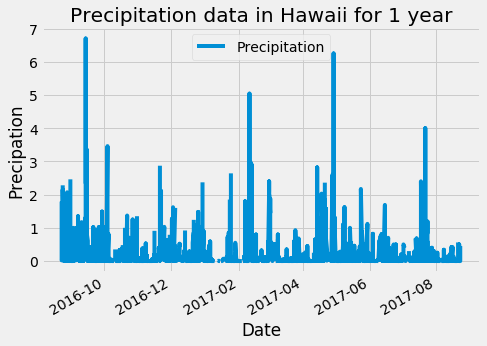

In [13]:
# Plot the Results in a Matplotlib bar chart
style.use('fivethirtyeight')
prec_plot = prec_df.plot(figsize =(7,5))
# Set a title and label for the chart
plt.title('Precipitation data in Hawaii for 1 year')
plt.ylabel('Precipation')
# Display legend to upper center
plt.legend(loc='upper center')
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_stats = prec_df.describe()
precipitation_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order.

  * Which station has the highest number of observations?

  * Hint: You may need to use functions such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

In [15]:
# Use Inspector to print the column names and types for station tables
col2 = inspector.get_columns('station')
for c2 in col2:
    print(c2['name'], c2['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Station.station).count()
print(f'Total number of stations: {total_stations}')

Total number of stations: 9


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
all_station = session.query(Measurement.station, func.count(Measurement.station)).filter(
    Station.station == Measurement.station).group_by(
    Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# List the stations and the counts in descending order.
for st in all_station:
    print(st)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [18]:
active_station = all_station[0][0]
print(f'Most active station: {active_station}')

Most active station: USC00519281


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature most active station?
tot_temp = session.query(Measurement.station, func.min(Measurement.tobs), func.max(
    Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == active_station).all()
print(tot_temp)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [20]:
# Choose the station with the highest number of temperature observations.
high_tobs = session.query(Measurement.tobs).\
    filter(Measurement.date >= query_date).filter(
        Measurement.station == active_station).all()
high_tobs_df = pd.DataFrame(high_tobs)
high_tobs_df.head()
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


In [21]:
# Perform a query to retrieve the data and temperature observations for 1year
tobs_result = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > query_date).all()

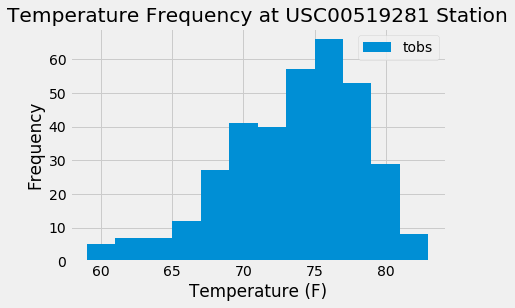

In [22]:
style.use('fivethirtyeight')
plt.hist(high_tobs_df['tobs'], label='tobs', bins=12)
# Incorporate the other graph properties
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Temperature Frequency at %s Station' % (active_station))
plt.show()

## Temperature Analysis 

* The starter notebook contains a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use '2017-01-01' if your trip start date was '2018-01-01').

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d'
# and return the minimum, average, and maximum temperatures for that range of dates


def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.

    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d

    Returns:
        TMIN, TAVE, and TMAX
    """

    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(
            Measurement.date <= end_date).all()

In [24]:
# This function called 'calc_date' will except start and end date
# and return 1 year prior date.


def calc_date(sdate, edate):

    # create dates 1 year prior
    dates = [sdate, edate]
    prior_dates = []
    for date in dates:
        date_list = date.split('-')
        date_list[0] = str(int(date_list[0]) - 1)
        new_date = '-'.join(date_list)
        prior_dates.append(new_date)
    return (prior_dates)

In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax
# * Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year
# (i.e., use '2017-01-01' if your trip start date was '2018-01-01').
vacation_dates = ['2018-01-01', '2018-01-08']
trip_date = calc_date(vacation_dates[0], vacation_dates[1])
start_trip_date = trip_date[0]
end_trip_date = trip_date[1]

# for your trip using the previous year's data for those same dates.
vact_date = calc_temps(start_trip_date, end_trip_date)
trip_min_temp = vact_date[0][0]
trip_avg_temp = vact_date[0][1]
trip_max_temp = vact_date[0][2]

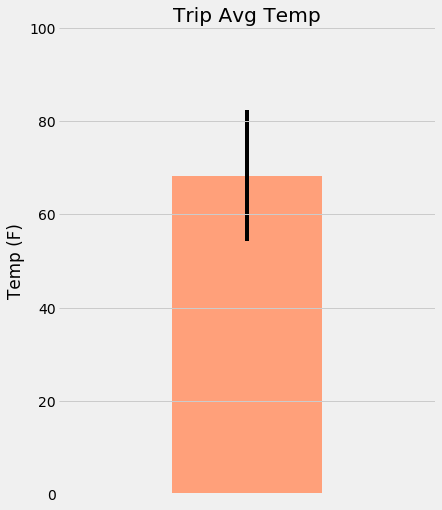

In [26]:
# Plot the results from your previous query as a bar chart.
# Use 'Trip Avg Temp' as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xlim(0, 2)
ax.set_ylim(0, 100)
ax.bar(1, trip_avg_temp, yerr=trip_max_temp - trip_min_temp,
       color='lightsalmon', align='center', tick_label='')
ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temp (F)')
ax.set_axisbelow(False)
ax.xaxis.grid()
plt.show()

## Other Recommended Analysis 

  * Calculate the rainfall per weather station using the previous year's matching dates.

* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.

  * You are provided with a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic tobs that match that date string.

  * Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

  * Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

  * Use Pandas to plot an area plot (`stacked=False`) for the daily normals.

In [27]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rain = [Station.station,
        Station.name,
        Station.latitude,
        Station.longitude,
        Station.elevation,
        ]

rainfall = session.query(*rain, func.sum(Measurement.prcp)).filter(
    Measurement.station == Station.station).filter(
    Measurement.date >= start_trip_date).filter(
    Measurement.date <= end_trip_date).group_by(
    Station.station).order_by(
    func.sum(Measurement.prcp).desc()).all()
print(rainfall)

[('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.63), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.63), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.61), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.35), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.2), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0)]


In [28]:
# set the dataframe using the rainfall query
rainfall_df = pd.DataFrame(rainfall, columns=[
                           'Station', 'Name', 'Latitude', 'Longitude', 'Elevation', 'Precipitation']).set_index('Station')
rainfall_df

,Name,Latitude,Longitude,Elevation,Precipitation
Station,,,,,
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.63
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.63
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.61
USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.35
USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.20
USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.00


## Optional Challenge Assignment

In [29]:
# Create a query that will calculate the daily normals
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)


def daily_normals(date):
    """Daily Normals.

    Args:
        date (str): A date string in the format '%m-%d'

    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax

    """

    sel = [func.min(Measurement.tobs), func.avg(
        Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime('%m-%d', Measurement.date) == date).all()

#Test the function with sample date
daily_normals('01-01')

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# calculate the daily normals for your trip
# Use the start and end date to create a range of dates
start_mon_day = dt.datetime.strptime(start_trip_date, '%Y-%m-%d').date()
end_mon_day = dt.datetime.strptime(end_trip_date, '%Y-%m-%d').date()

# Use the start and end date to create a range of dates
trip_count = ((end_mon_day - start_mon_day).days)+1

# push each tuple of calculations into a list called `normals`
normals = []
trip_dates = []
actual_dates = []
# Loop through the list of %m-%d strings and calculate the normals for each date
for i in range(trip_count):
    trip_prior_date = start_mon_day + dt.timedelta(i)
    trip_act_date = trip_prior_date.replace(year=(trip_prior_date.year + 1))
    # Stip off the year and save a list of %m-%d strings
    day_only = trip_prior_date.strftime('%m-%d')
    trip_dates.append(trip_prior_date)
    actual_dates.append(trip_act_date)
    normals.append(daily_normals(day_only)[0])

normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0),
 (57.0, 67.16071428571429, 75.0)]

In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(
    normals, columns=['tmin', 'tavg', 'tmax'], index=actual_dates)
normals_df.index.names = ['date']
normals_df

,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0
2018-01-06,61.0,68.964912,76.0
2018-01-07,57.0,68.543860,76.0
2018-01-08,57.0,67.160714,75.0


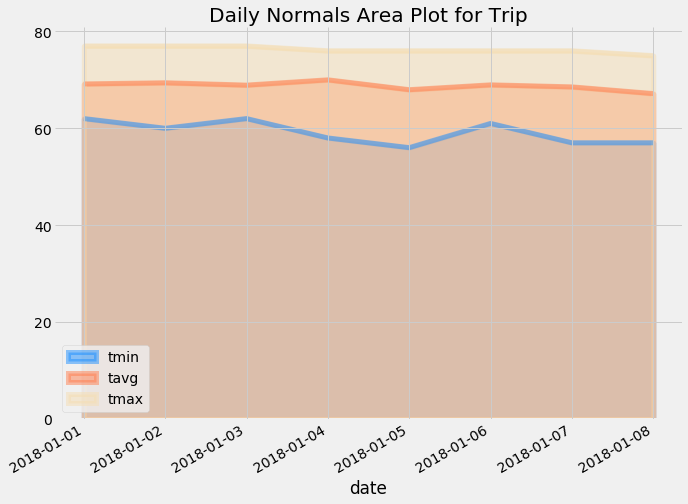

In [32]:
# Plot the daily normals as an area plot with `stacked=False`

normals_df.plot(kind='area', stacked=False, rot=45, color=['dodgerblue', 'coral', 'wheat'],
                figsize=(10, 8), lw=5)
plt.title('Daily Normals Area Plot for Trip')
plt.yticks(np.arange(0, 90, step=20))
plt.gcf().autofmt_xdate()
ax = plt.gca()
ax.set_axisbelow(False)
plt.show()